In [1]:
from PIL import Image
import glob
import tensorflow as tf
import numpy as np
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten, Input
from keras.utils import np_utils
from keras.layers import Add
from keras.layers import concatenate
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model
import matplotlib.pyplot as plt
import pandas as pd
import itertools  
import matplotlib.image as mpimg
%matplotlib inline
import math 
import datetime
import time



# First Thermal model 

image_list = []

def my_load_Train_data_1() :
    image_list = []
    for filename in glob.glob('C:/Users/MANDEEP SINGH SHERRY/Desktop/Thesis Research/CNN model/Thermal Images/differernt case/training/*.jpg'): #assuming gif
        im=Image.open(filename)
        img = im.resize((32,32),Image.ANTIALIAS)
        img= tf.keras.preprocessing.image.img_to_array(img)
        img= img.reshape(32, 32, 3)
        img =img.astype('float32')
        img = img / 255.0
        image_list.append(img)

    return image_list

def my_load_Test_data_1() :
    image_list = []
    for filename in glob.glob('C:/Users/MANDEEP SINGH SHERRY/Desktop/Thesis Research/CNN model/Thermal Images/differernt case/testing/*.jpg'): #assuming gif
        im=Image.open(filename)
        img = im.resize((32,32),Image.ANTIALIAS)
        img= tf.keras.preprocessing.image.img_to_array(img)
        img= img.reshape(32, 32, 3)
        img =img.astype('float32')
        img = img / 255.0
        image_list.append(img)

    return image_list

X1_train = my_load_Train_data_1()
X1_test = my_load_Test_data_1()
#print(len(X1_test))
y1_train = pd.read_csv('C:/Users/MANDEEP SINGH SHERRY/Desktop/Thesis Research/Thermal Images/training/y_labels.csv')
y1_test = pd.read_csv('C:/Users/MANDEEP SINGH SHERRY/Desktop/Thesis Research/Thermal Images/testing/y_test_labels.csv')
y1_test.values.reshape(-1,1)

n_classes = 8
X1_train = np.array(X1_train)
Y1_train = np.array(y1_train)
X1_test = np.array(X1_test)
Y1_test = np.array(y1_test)

Y1_train = np_utils.to_categorical(Y1_train, n_classes)
Y1_test = np_utils.to_categorical(Y1_test, n_classes)
# len(X1_train)
# print(Y1_test)
X1_train.shape
Y1_train.shape

#Secound Camera model

image_list = []

def my_load_Train_data_2() :
    image_list = []
    for filename in glob.glob('C:/Users/MANDEEP SINGH SHERRY/Desktop/Thesis Research/CNN model/Camera Images/differernt case/training/*.jpg'): #assuming gif
        im=Image.open(filename)
        img = im.resize((32,32),Image.ANTIALIAS)
        img= tf.keras.preprocessing.image.img_to_array(img)
        img= img.reshape(32, 32, 3)
        img =img.astype('float32')
        img = img / 255.0
        image_list.append(img)

    return image_list

def my_load_Test_data_2() :
    image_list = []
    for filename in glob.glob('C:/Users/MANDEEP SINGH SHERRY/Desktop/Thesis Research/CNN model/Camera Images/differernt case/testing/*.jpg'): #assuming gif
        im=Image.open(filename)
        img = im.resize((32,32),Image.ANTIALIAS)
        img= tf.keras.preprocessing.image.img_to_array(img)
        img= img.reshape(32, 32, 3)
        img =img.astype('float32')
        img = img / 255.0
        image_list.append(img)

    return image_list

X2_train = my_load_Train_data_2()
X2_test = my_load_Test_data_2()
print(len(X2_test))
y2_train = pd.read_csv('C:/Users/MANDEEP SINGH SHERRY/Desktop/Thesis Research/Camera Images/training/y_labels.csv')
y2_test = pd.read_csv('C:/Users/MANDEEP SINGH SHERRY/Desktop/Thesis Research/Camera Images/testing/y_test_labels.csv')
y2_test.values.reshape(-1,1)

n_classes = 8
X2_train = np.array(X2_train)
Y2_train = np.array(y2_train)
X2_test = np.array(X2_test)
Y2_test = np.array(y2_test)

Y2_train = np_utils.to_categorical(Y2_train, n_classes)
Y2_test = np_utils.to_categorical(Y2_test, n_classes)


# Model 1(Thermal)

inp1 = Input(shape=(32, 32, 3))

# convolutional layer
conv1=Conv2D(100, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')(inp1)

# convolutional layer
conv2 =Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')(conv1)
pool1=MaxPool2D(pool_size=(2,2))(conv2)
conv3=Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')(pool1)
pool2=MaxPool2D(pool_size=(2,2))(conv3)

# flatten output of conv
flat1=Flatten()(pool2)

# hidden layer
hidd1=(Dense(25, activation='relu'))(flat1)
dense1=(Dense(10, activation='relu'))(hidd1)
output1=Flatten()(dense1)

#output= (Dense(10, activation='relu'))(model_1)

# Model 2

# convolutional layer
inp2 = Input(shape=(32, 32, 3))

# convolutional layer
conv1 =Conv2D(100, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')(inp2)

# convolutional layer
conv2 =Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')(conv1)
pool1=MaxPool2D(pool_size=(2,2))(conv2)
conv3=Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')(pool1)
pool2=MaxPool2D(pool_size=(2,2))(conv3)

# flatten output of conv
flat1=Flatten()(pool2)

# hidden layer
hidd1=Dense(25, activation='relu')(flat1)
dense2=Dense(10, activation='relu')(hidd1)
output2=Flatten()(dense2)

print(output1)
print(output2)

# concatinate two models 

concat1 = concatenate([output1, output2])

Out  = Dense(8, activation='softmax')(concat1)

model_concat = Model(inputs=[inp1, inp2], outputs = Out)

# compiling the sequential model
model_concat.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam') 




# training the model for 10 epochs
history= model_concat.fit([X1_train,X2_train],Y2_train, batch_size=128,epochs=15,validation_data=([X1_test,X2_test],Y2_test))




400
KerasTensor(type_spec=TensorSpec(shape=(None, 10), dtype=tf.float32, name=None), name='flatten_1/Reshape:0', description="created by layer 'flatten_1'")
KerasTensor(type_spec=TensorSpec(shape=(None, 10), dtype=tf.float32, name=None), name='flatten_3/Reshape:0', description="created by layer 'flatten_3'")


In [2]:
model_concat.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 32, 32, 100)  2800        input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 32, 32, 100)  2800        input_2[0][0]                    
______________________________________________________________________________________________

In [5]:
model_concat.save('Concat_Model')
#model.save_weights(top_model_weights_path)
start = datetime.datetime.now()
(eval_loss, eval_accuracy) = model_concat.evaluate([X1_test,X2_test],Y2_test, batch_size=128, verbose=1)
print('[INFO] Accuracy: {:.2f}%'.format(eval_accuracy * 100)) 
print('[INFO] Loss: {}'.format(eval_loss)) 
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

INFO:tensorflow:Assets written to: Concat_Model\assets
4/4 [==============================] - 2s 398ms/step - loss: 0.9574 - accuracy: 0.6700
[INFO] Accuracy: 67.00%
[INFO] Loss: 0.9573884010314941
Time:  0:00:01.795713


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


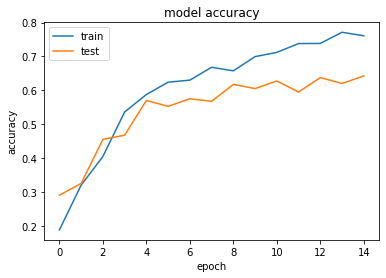

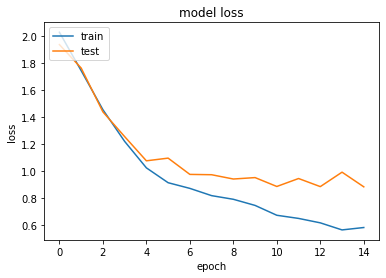

In [11]:
import matplotlib.pyplot as plt

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()




Fusion of thermal_bottle215.jpg and camera_chair258.jpg are: 
Input image: chair_bottle

probality of chair_bottle:  33.604153990745544

probality of plate_bottle:  63.97991180419922

probality of spectacle_laptop:  0.050371099496260285

probality of table_bottle:  2.338956855237484

probality of table_chair:  6.859081054244598e-05

probality of table_laptop:  0.012214836897328496

probality of table_plate:  6.806326382502448e-05

probality of table_spectacle:  0.014254942652769387


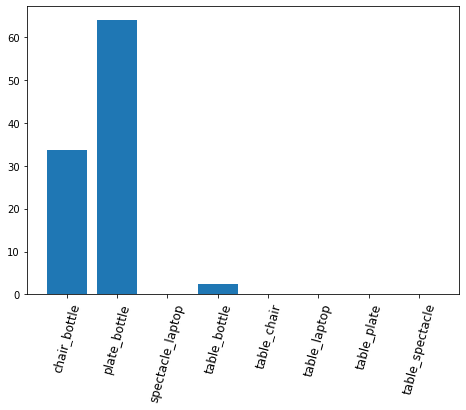

__________________________________________________________________
Fusion of thermal_bottle215.jpg and camera_plate273.jpg are: 
Input image: plate_bottle

probality of chair_bottle:  2.6038523763418198

probality of plate_bottle:  97.35004901885986

probality of spectacle_laptop:  0.03153287107124925

probality of table_bottle:  0.014116527745500207

probality of table_chair:  3.619378130537143e-07

probality of table_laptop:  3.667893224701402e-05

probality of table_plate:  5.232902111629301e-07

probality of table_spectacle:  0.00041808380046859384


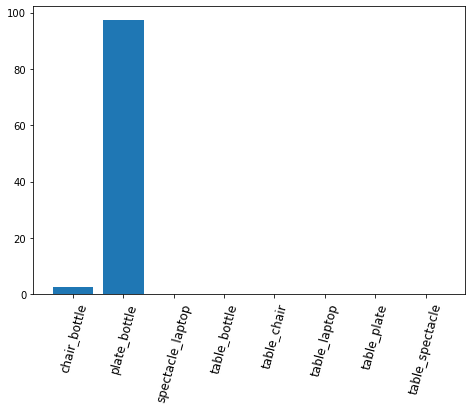

__________________________________________________________________
Fusion of thermal_laptop258.jpg and camera_spectacle279.jpg are: 
Input image: spectacle_laptop

probality of chair_bottle:  3.595838222736347e-05

probality of plate_bottle:  1.7365326954177362e-06

probality of spectacle_laptop:  56.61889910697937

probality of table_bottle:  7.93435508148686e-14

probality of table_chair:  4.1838813573122025

probality of table_laptop:  39.157289266586304

probality of table_plate:  3.757512356816761e-08

probality of table_spectacle:  0.03989957622252405


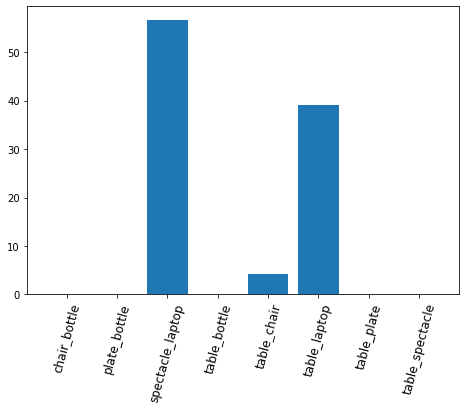

__________________________________________________________________
Fusion of thermal_bottle215.jpg and camera_table252.jpg are: 
Input image: table_bottle

probality of chair_bottle:  32.06035792827606

probality of plate_bottle:  3.863080218434334

probality of spectacle_laptop:  0.2720830263569951

probality of table_bottle:  63.629406690597534

probality of table_chair:  0.0006212132120708702

probality of table_laptop:  0.022097292821854353

probality of table_plate:  0.0004309034011384938

probality of table_spectacle:  0.15193171566352248


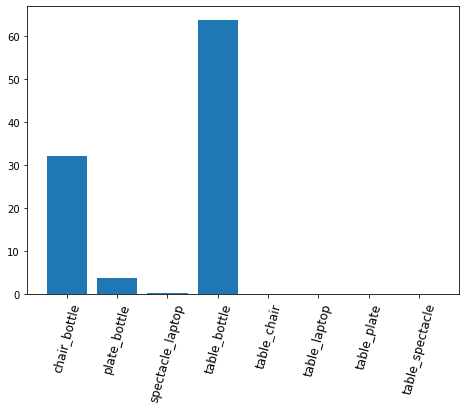

__________________________________________________________________
Fusion of thermal_chair261.jpg and camera_table252.jpg are: 
Input image: table_chair

probality of chair_bottle:  0.049134716391563416

probality of plate_bottle:  0.158716703299433

probality of spectacle_laptop:  63.85215520858765

probality of table_bottle:  0.6248107179999352

probality of table_chair:  18.21000874042511

probality of table_laptop:  0.9552350267767906

probality of table_plate:  8.868904411792755

probality of table_spectacle:  7.281029969453812


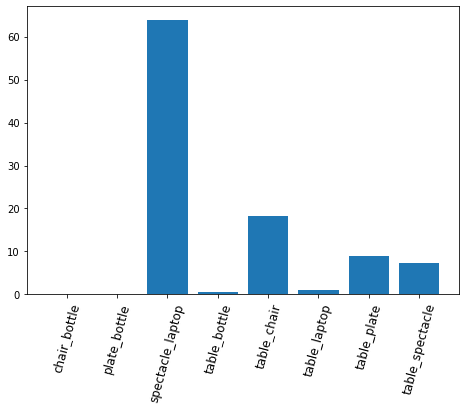

__________________________________________________________________
Fusion of thermal_laptop258.jpg and camera_table252.jpg are: 
Input image: table_laptop

probality of chair_bottle:  4.288168611310539e-05

probality of plate_bottle:  6.234305516272798e-07

probality of spectacle_laptop:  38.38376998901367

probality of table_bottle:  2.1809813019300775e-13

probality of table_chair:  6.353385001420975

probality of table_laptop:  55.187827348709106

probality of table_plate:  7.647260602539063e-08

probality of table_spectacle:  0.07498256163671613


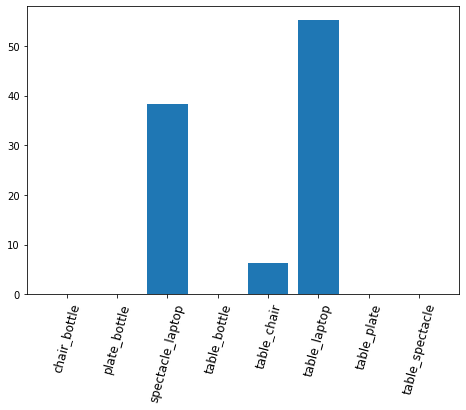

__________________________________________________________________
Fusion of thermal_plate260.jpg and camera_table252.jpg are: 
Input image: table_plate

probality of chair_bottle:  0.0020636025510611944

probality of plate_bottle:  2.9173483540034795e-05

probality of spectacle_laptop:  0.06695532356388867

probality of table_bottle:  0.00285026562778512

probality of table_chair:  0.4204336553812027

probality of table_laptop:  23.550070822238922

probality of table_plate:  75.9403645992279

probality of table_spectacle:  0.017238502914551646


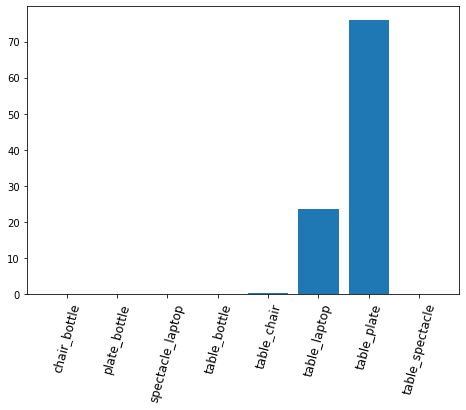

__________________________________________________________________
Fusion of thermal_spectacle261.jpg and camera_table252.jpg are: 
Input image: table_spectacle

probality of chair_bottle:  0.011010556772816926

probality of plate_bottle:  0.07625498692505062

probality of spectacle_laptop:  19.084550440311432

probality of table_bottle:  1.7470611624048615e-05

probality of table_chair:  1.6513990238308907

probality of table_laptop:  5.946503579616547

probality of table_plate:  0.0025313582227681763

probality of table_spectacle:  73.22773337364197


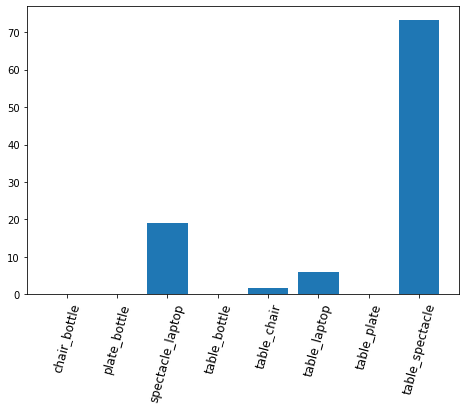

__________________________________________________________________


In [17]:

# make a prediction for a new image.
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array


ListPic1 = ['thermal_bottle215.jpg','thermal_bottle215.jpg','thermal_laptop258.jpg','thermal_bottle215.jpg',
           'thermal_chair261.jpg','thermal_laptop258.jpg','thermal_plate260.jpg','thermal_spectacle261.jpg']


ListPic2 = ['camera_chair258.jpg','camera_plate273.jpg','camera_spectacle279.jpg','camera_table252.jpg',
             'camera_table252.jpg','camera_table252.jpg','camera_table252.jpg','camera_table252.jpg'] 


ListPic2[0]
for i in range(len(ListPic1)): 

 
    # load the image thermal
    img1 = load_img(ListPic1[i], target_size=(32, 32))
    # convert to array
    img1 = img_to_array(img1)
    # reshape into a single sample with 3 channels
    img1 = img1.reshape(1,32, 32, 3)
    # prepare pixel data
    img1 = img1.astype('float32')
    img1 = img1 / 255.0

 # for second Model
 # load the camera image
    
    img2 = load_img(ListPic2[i], target_size=(32, 32))
    # convert to array
    img2 = img_to_array(img2)
    # reshape into a single sample with 3 channels
    img2 = img2.reshape(1,32, 32, 3)
    # prepare pixel data
    img2 = img2.astype('float32')
    img2 = img2 / 255.0
    

    x = ['chair_bottle','plate_bottle','spectacle_laptop','table_bottle','table_chair','table_laptop','table_plate', 'table_spectacle']
    print('Fusion of ' +ListPic1[i]+ ' and ' +ListPic2[i]+ ' are: ')
    result = model_concat.predict([img1,img2])
    #print(result)
    #print(item1,item2)
 
   
    print('Input image:',x[i])
    #print(result)
    print('')
    Bed = result[0][0]*100
    print("probality of chair_bottle: ", Bed)
    print()
    Bottle = result[0][1]*100
    print("probality of plate_bottle: ", Bottle)
    print()
    Chair = result[0][2]*100
    print("probality of spectacle_laptop: ", result[0][2]*100)
    print()
    Laptop = result[0][3]*100
    print("probality of table_bottle: ", result[0][3]*100)
    print()
    Plate = result[0][4]*100
    print("probality of table_chair: ", result[0][4]*100)
    print()
    Sofa = result[0][5]*100   
    print("probality of table_laptop: ", result[0][5]*100)
    print()
    Spectacle = result[0][6]*100
    print("probality of table_plate: ", result[0][6]*100)
    print()
    Table = result[0][7]*100   
    print("probality of table_spectacle: ", result[0][7]*100)
    
    # importing the required module
    import matplotlib.pyplot as plt
  
    fig = plt.figure()
    plt.rcParams['xtick.labelsize'] = 'large' 
    ax = fig.add_axes([0,0,1,1])    

    # x axis values
    x = ['chair_bottle','plate_bottle','spectacle_laptop','table_bottle','table_chair','table_laptop','table_plate', 'table_spectacle']
    # corresponding y axis values
    y = [Bed,Bottle,Chair,Laptop,Plate,Sofa,Spectacle,Table]

    ax.bar(x,y)
    plt.xticks(rotation=75)
    plt.show()   
    
    print("__________________________________________________________________")

In [20]:
import numpy as np
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
import itertools  


preds = np.round(model_concat.predict([X1_test,X2_test]),0)
#print('rounded test_labels', preds)


print('Classification Matrix')

fusion = ['chair_bottle','plate_bottle','spectacle_laptop','table_bottle','table_chair','table_laptop','table_plate', 'table_spectacle']
classification_metrics = metrics.classification_report(Y2_test, preds,target_names = fusion)
print(classification_metrics)

print('Confusion Matrix')

sign=[0,1,2,3,4,5,6,7]
cf_matrix = confusion_matrix(Y2_test.argmax(axis=1), preds.argmax(axis=1),sign)
print(cf_matrix)

Classification Matrix
                  precision    recall  f1-score   support

    chair_bottle       0.62      0.36      0.46        50
    plate_bottle       0.79      0.92      0.85        50
spectacle_laptop       0.60      0.36      0.45        50
    table_bottle       0.64      0.76      0.70        50
     table_chair       0.58      0.66      0.62        50
    table_laptop       0.56      0.38      0.45        50
     table_plate       1.00      0.88      0.94        50
 table_spectacle       0.51      0.46      0.48        50

       micro avg       0.67      0.60      0.63       400
       macro avg       0.66      0.60      0.62       400
    weighted avg       0.66      0.60      0.62       400
     samples avg       0.60      0.60      0.60       400

Confusion Matrix
[[20 11  0 19  0  0  0  0]
 [ 2 46  0  2  0  0  0  0]
 [10  0 18  0  5  8  0  9]
 [11  1  0 38  0  0  0  0]
 [ 8  0  3  0 33  2  0  4]
 [ 5  0  7  0 11 19  0  8]
 [ 3  0  0  0  2  0 44  1]
 [14  0  2  0  

C:\Users\MANDEEP SINGH SHERRY\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MANDEEP SINGH SHERRY\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass labels=[0, 1, 2, 3, 4, 5, 6, 7] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Normalized confusion matrix


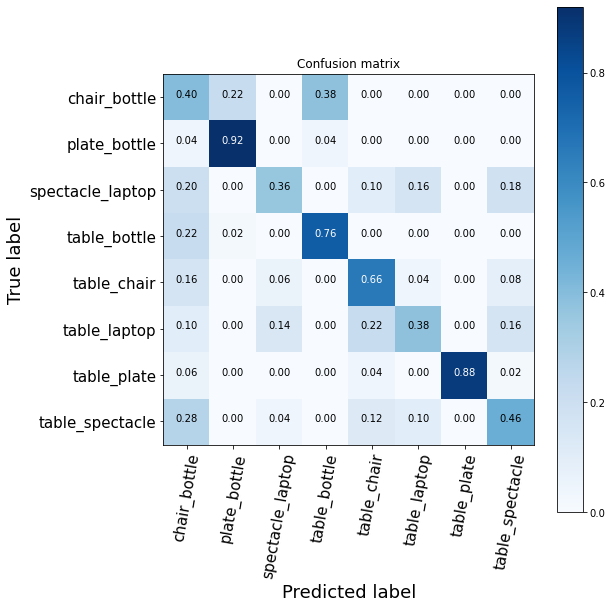

In [21]:
import numpy as np
%matplotlib inline
from sklearn.metrics import confusion_matrix

categorical_test_labels = pd.DataFrame(Y1_test).idxmax(axis=1)
categorical_preds = pd.DataFrame(preds).idxmax(axis=1)
confusion_matrix= confusion_matrix(categorical_test_labels, categorical_preds)

#To get better visual of the confusion matrix:
def plot_confusion_matrix(cm, classes,
   normalize=False,
   title='Confusion matrix',
   cmap=plt.cm.Blues):
 
#Add Normalization Option
 #‘’’prints pretty confusion metric with normalization option ‘’’
   if normalize:
     cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
     print('Normalized confusion matrix')
   else:
     print('Confusion matrix, without normalization')
 
# print(cm)
   plt.figure(figsize=(8, 8))
   plt.imshow(cm, interpolation='nearest', cmap=cmap)
   plt.title(title)
   plt.colorbar()
   tick_marks = np.arange(len(classes))
   plt.xticks(tick_marks, classes, rotation=45)
   plt.yticks(tick_marks, classes)
 
   fmt = '.2f' if normalize else 'd'
   thresh = cm.max() / 2.
   for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt), horizontalalignment='center', color='white' if cm[i, j] > thresh else 'black')
 
   plt.tight_layout()
    
    # Labels, title and ticks
   label_font = {'size':'18'}  # Adjust to fit
   plt.xlabel('Predicted label', fontdict=label_font);
   plt.ylabel('True label', fontdict=label_font);
   plt.tick_params(labelsize = 15) 
   plt.xticks(rotation=80)   
    
    
plot_confusion_matrix(confusion_matrix, fusion , normalize= True) 